In [1]:
import csv
import sys
import os
import pandas as pd
import numpy as np
from numpy import *
from datetime import datetime
from operator import itemgetter
from collections import defaultdict

import itertools
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline



#plt.style.use('ggplot')
df=pd.read_excel('H:/lottery/ssq.xls',sheet_name='data')
df.columns=['num', 'date', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'b', 'sr1', 'sr2',
       'sr3', 'sr4', 'sr5', 'sr6', 'sales_volume', 'pool', 'first', 'bonus1', 'second', 'bonus2',
       'third', 'bonus3', 'fourth', 'bonus4', 'fifth', 'bonus5', 'sexth', 'bonus6']
#df.tail()
X = df.loc[:, 'b': 'sr6']
X.rename(columns={'b':'sr0'}, inplace=True)
X.tail()

,sr0,sr1,sr2,sr3,sr4,sr5,sr6
2181,2,31,13,5,23,25,14
2182,11,7,27,10,1,11,26
2183,11,9,13,5,2,3,28
2184,11,30,23,18,15,17,6
2185,4,28,5,4,11,14,32


In [ ]:
################    1 multiclass model 
################    1.1 preprocessing data 

In [3]:
starttime = datetime.now()
num_rows = X.shape[0]
def creat_datasets(X, features ):
    df_ = pd.DataFrame(columns = list(range(0, features)))
    index = 0
    for i in range(features, num_rows+1):
        df_.loc[index] = X[col][i-features: i].reset_index(drop = True)
        index += 1
    return df_

for col in X.columns :
    locals()['df_'+ str(col)] = creat_datasets(X, 200)
endtime = datetime.now()
Time = endtime - starttime
print(Time.seconds, 'seconds')
# 至此7个数据集完成

81 seconds


In [7]:
def classifier_data(df_):
    # choose frequence >10 samples
    #df = df_[df_[99].isin(df_[99].groupby(df_[99]).count()[df_[99].groupby(df_[99]).count()>30].index)]
    X_ = df_.iloc[:, : -1].values
    y_ =  df_.iloc[:, -1].astype(str).values
    X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, random_state=14)
    return X_, y_, X_train, X_test, y_train, y_test
def classifier_score(clf, cv=3):
    precision = cross_val_score(clf, X_, y_, cv=cv, scoring='precision_weighted')
    recall = cross_val_score(clf, X_, y_, cv=cv, scoring='recall_weighted')
    fls = cross_val_score(clf, X_, y_, cv=cv, scoring='f1_weighted')
    return precision, recall, fls

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
################    1.2 DecisionTreeClassifier model parameters choose and predict 

Fitting 3 folds for each of 42 candidates, totalling 126 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    7.6s finished
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'pr

df_R3 ['16'] precison: [ 0.04176309  0.03533396  0.04189062] recall: [ 0.04101839  0.04447633  0.03513909] f1: [ 0.03792289  0.03798495  0.03481707]
Pipeline(steps=[('clf', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=13,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=14, splitter='best'))])
             precision    recall  f1-score   support

          1       0.35      0.40      0.37        20
         10       0.16      0.28      0.20        18
         11       0.31      0.48      0.38        23
         12       0.19      0.20      0.19        15
         13       0.23      0.56      0.33        18
         14       0.26      0.38      0.31        26
         15       0.30      0.27      0.29        22
         16       0.30      0.18      0.22        17
         17       0.26      0.36     

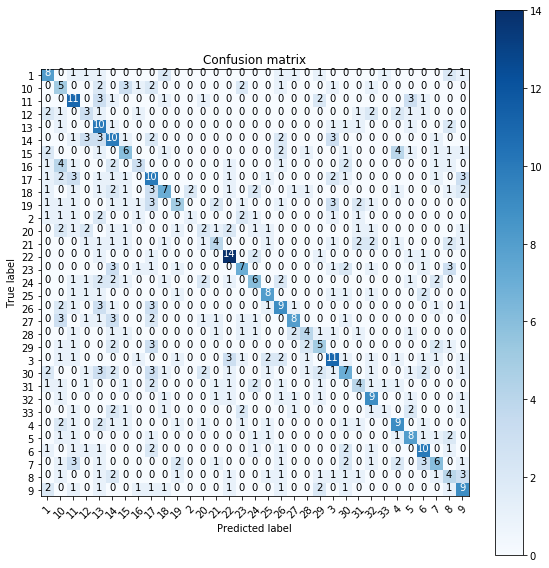

Fitting 3 folds for each of 42 candidates, totalling 126 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    7.3s finished
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'pr

df_R4 ['3'] precison: [ 0.02  0.03  0.04] recall: [ 0.03  0.04  0.05] f1: [ 0.02  0.03  0.04]
Pipeline(steps=[('clf', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=14,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=14, splitter='best'))])
             precision    recall  f1-score   support

          1       0.36      0.28      0.31        18
         10       0.39      0.55      0.46        20
         11       0.00      0.00      0.00        17
         12       0.33      0.37      0.35        35
         13       0.21      0.15      0.18        20
         14       0.36      0.17      0.24        23
         15       0.43      0.19      0.26        16
         16       0.30      0.27      0.29        22
         17       0.40      0.32      0.36        25
         18       0.28      0.28      0

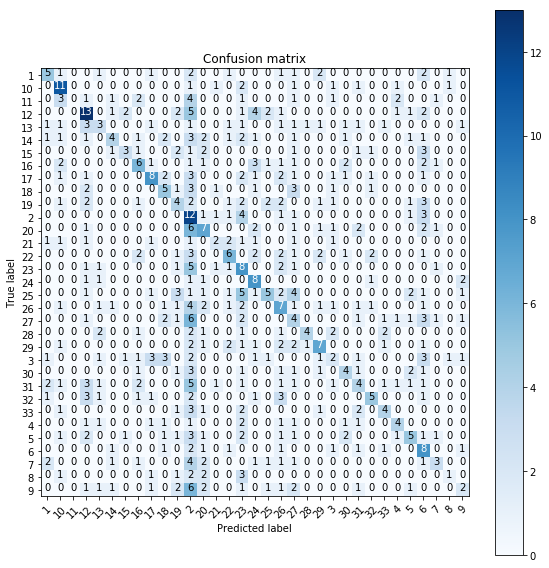

Fitting 3 folds for each of 42 candidates, totalling 126 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    7.1s finished
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', '

df_R5 ['19'] precison: [ 0.04  0.03  0.03] recall: [ 0.04  0.04  0.03] f1: [ 0.04  0.03  0.03]
Pipeline(steps=[('clf', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=11,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=40, min_weight_fraction_leaf=0.0,
            presort=False, random_state=14, splitter='best'))])
             precision    recall  f1-score   support

          1       0.16      0.52      0.24        21
         10       0.00      0.00      0.00        20
         11       0.26      0.43      0.33        21
         12       0.29      0.24      0.26        21
         13       0.12      0.18      0.14        22
         14       0.60      0.15      0.24        20
         15       0.14      0.07      0.10        14
         16       0.24      0.35      0.28        23
         17       0.33      0.12      0.17        26
         18       0.38      0.29     

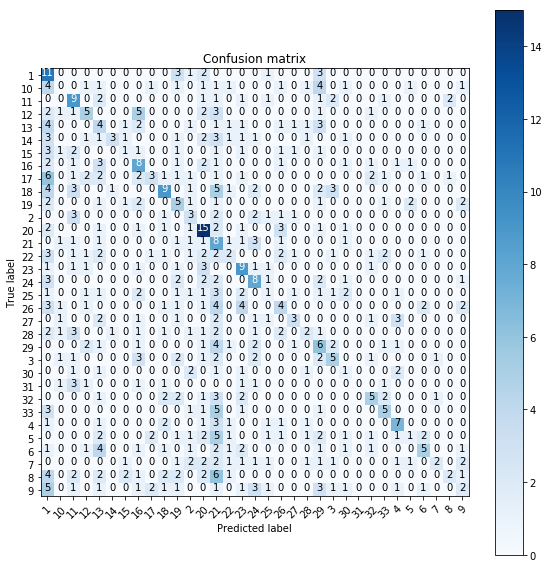

Fitting 3 folds for each of 42 candidates, totalling 126 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    7.7s finished
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', '

df_R6 ['2'] precison: [ 0.03  0.02  0.03] recall: [ 0.04  0.04  0.04] f1: [ 0.03  0.03  0.03]
Pipeline(steps=[('clf', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=30,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=14, splitter='best'))])
             precision    recall  f1-score   support

          1       0.30      0.33      0.32        39
         10       0.17      0.22      0.19        23
         11       0.13      0.11      0.12        19
         12       0.11      0.11      0.11        18
         13       0.13      0.22      0.16        18
         14       0.20      0.28      0.23        18
         15       0.26      0.33      0.30        27
         16       0.27      0.29      0.28        24
         17       0.00      0.00      0.00        15
         18       0.10      0.11      0

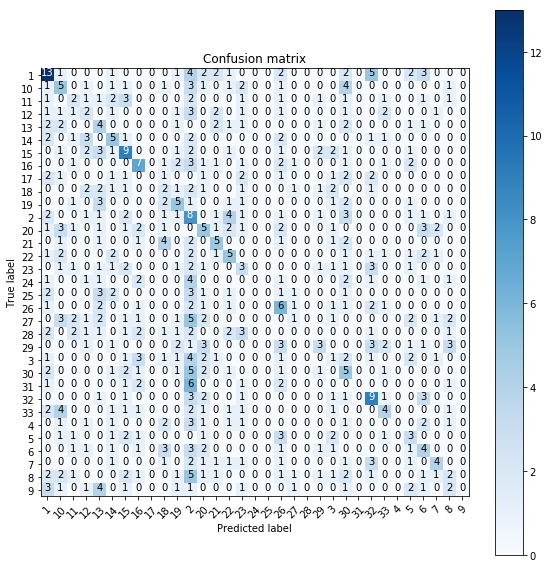

50 seconds


In [8]:
from sklearn.tree import DecisionTreeClassifier
######### DT  predict result
# gridsearchCV looking for best parameters
starttime = datetime.now()
#start = time.time()

pipeline_DT = Pipeline([('clf', DecisionTreeClassifier(random_state=14))])
paras_DT = {'clf__max_depth': (10, 11, 12, 13, 14, 15, 20),
            'clf__criterion': ('gini',),
            'clf__min_samples_split': (2, 40),
            'clf__min_samples_leaf': (10, 30, 100)}
for i in range(1,7):
    df_ =  locals()['df_sr'+ str(i)]
    X_, y_, X_train, X_test, y_train, y_test = classifier_data(df_)
    
    grid_DT=GridSearchCV(pipeline_DT, paras_DT, n_jobs=-1, verbose=1, scoring=None)
    #default=None, and the default scorer of DT is accuracy. see also DecisionTreeClassifier.score(X, y)
    
    new = grid_DT.predict(df_.iloc[-1,1: ].values.reshape(1,-1))
    grid_DT.fit(X_train, y_train)
    # evaluation for best parameters
    precision, recall, fls = classifier_score(grid_DT.best_estimator_)
    
    print('df_R'+ str(i), new, 'precison:', precision, 'recall:', recall, 'f1:', fls)
    print(grid_DT.best_estimator_)
    
    class_names = np.unique(y_train)
    y_pred = grid_DT.predict(X_test)
    report = classification_report(y_test, y_pred)
    c = np.sum(y_test == y_pred)
    print(report)
    print('n_accuracy:', c)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    plt.figure(figsize=(8,8))
    plot_confusion_matrix(cnf_matrix, classes=class_names)
    plt.show()

endtime = datetime.now()
#end = time.time()
#print(start-end)
Time = endtime - starttime
print(Time.seconds, 'seconds')

In [11]:
# why 'F-score is ill-defined and being set to 0.0 in labels with no predicted samples' is always exist, the numbers of classes are too many
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
df_ = df_r1
# choose frequence >10 samples
df_ = df_[df_[99].isin(df_[99].groupby(df_[99]).count()[df_[99].groupby(df_[99]).count()>30].index)]
X_ = df_.iloc[:, : -1].values
y_ =  df_[99].astype(str).values
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.33, random_state=14)
grid_DT=GridSearchCV(pipeline_DT, paras_DT, n_jobs=-1, verbose=1)
    #default=None, and the default scorer of DT is accuracy. see also DecisionTreeClassifier.score(X, y)
grid_DT.fit(X_train, y_train)
    # evaluation for best parameters
'''precision = cross_val_score(grid_DT.best_estimator_, X_train, y_train, cv=3, scoring='precision_weighted')#预测为正类的样本中实际有多少是正
recall = cross_val_score(grid_DT.best_estimator_, X_train, y_train, cv=3, scoring='recall_weighted')#实际是正类的样本有多少被预测出来
fls = cross_val_score(grid_DT.best_estimator_, X_train, y_train, cv=3, scoring='f1_weighted')
new = grid_DT.predict(df_.iloc[-1,1: ].values.reshape(1,-1))'''
y_predict = grid_DT.best_estimator_.predict(X_test)
print(classification_report(y_test, y_predict))
print(grid_DT.best_estimator_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 155 out of 162 | elapsed:    5.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:    5.5s finished


             precision    recall  f1-score   support

          1       0.15      0.03      0.05       138
         10       0.03      0.10      0.04        21
         11       0.03      0.18      0.05        17
         12       0.00      0.00      0.00        14
          2       0.07      0.01      0.02        86
          3       0.00      0.00      0.00        98
          4       0.13      0.13      0.13        68
          5       0.05      0.02      0.03        60
          6       0.07      0.08      0.07        50
          7       0.03      0.05      0.03        42
          8       0.07      0.13      0.09        31
          9       0.05      0.12      0.07        34

avg / total       0.07      0.05      0.05       659

Pipeline(steps=[('clf', DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=10, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=20,
            min_samples_split=2, min_

D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
################    1.3  AdaBoostClassifier model parameters choose and predict

df_R1 ['32'] precison: [ 0.04  0.03  0.04] recall: [ 0.03  0.03  0.03] f1: [ 0.03  0.03  0.03]
Confusion matrix, without normalization
[[3 1 2 ..., 1 0 0]
 [1 1 0 ..., 0 0 0]
 [2 1 1 ..., 0 0 1]
 ..., 
 [2 3 0 ..., 1 0 1]
 [2 2 2 ..., 0 1 0]
 [0 2 2 ..., 0 0 3]]


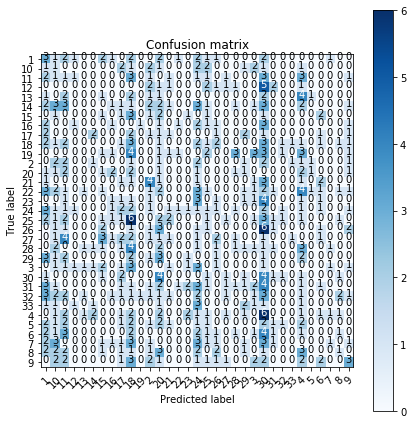

532 seconds


In [7]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, random_state=14, class_weight='balanced'), 
                         random_state=14, n_estimators=1000, learning_rate=1)
# 为什么加上max_depth=2后程序反而慢很多，是因为要剪枝吗？？？
for i in range(1,7):
    df_ =  locals()['df_sr'+ str(i)]
    X_, y_, X_train, X_test, y_train, y_test = classifier_data(df_)
    
    precision, recall, fls = classifier_score(clf)
    
    clf.fit(X_, y_)
    new = clf.predict(df_.iloc[-1,1: ].values.reshape(1,-1))
    print('df_R'+ str(i), new, 'precison:', precision, 'recall:', recall, 'f1:', fls)
    
    clf.fit(X_train, y_train)
    class_names = clf.classes_
    y_pred = clf.predict(X_test)
    report = classification_report(y_test, y_pred)
    c = np.sum(y_test == y_pred)
    print(report)
    print('n_accuracy:', c)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    plt.figure(figsize=(8,8))
    plot_confusion_matrix(cnf_matrix, classes=class_names)
    plt.show()

endtime = datetime.now()
#end = time.time()
#print(start-end)
Time = endtime - starttime
print(Time.seconds, 'seconds')

In [ ]:
################    1.4  BaggingClassifier model parameters choose and predict 

df_R1 ['18'] precison: [ 0.03  0.04  0.03] recall: [ 0.03  0.04  0.03] f1: [ 0.03  0.04  0.03]
Confusion matrix, without normalization
[[1 1 0 ..., 0 1 0]
 [1 3 0 ..., 1 1 0]
 [2 0 0 ..., 2 1 1]
 ..., 
 [0 2 0 ..., 0 1 0]
 [1 1 1 ..., 2 0 0]
 [2 1 0 ..., 2 0 0]]


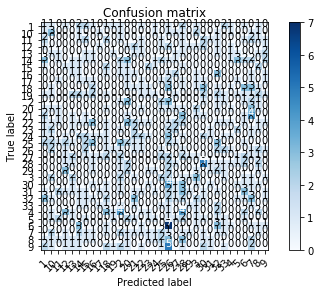

df_R2 ['10'] precison: [ 0.03  0.02  0.03] recall: [ 0.03  0.02  0.03] f1: [ 0.03  0.02  0.03]
Confusion matrix, without normalization
[[3 2 1 ..., 0 0 0]
 [1 4 0 ..., 2 0 0]
 [0 1 2 ..., 0 1 0]
 ..., 
 [1 0 2 ..., 1 0 0]
 [0 1 0 ..., 1 1 0]
 [2 0 0 ..., 0 0 0]]


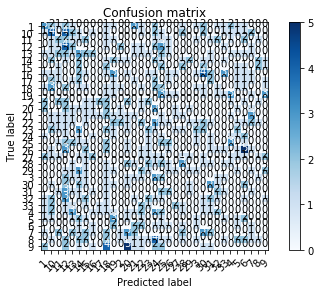

df_R3 ['23'] precison: [ 0.03  0.03  0.04] recall: [ 0.03  0.03  0.04] f1: [ 0.03  0.03  0.04]
Confusion matrix, without normalization
[[1 0 0 ..., 1 0 0]
 [0 0 0 ..., 0 0 0]
 [1 0 1 ..., 0 1 0]
 ..., 
 [0 2 0 ..., 0 1 2]
 [0 0 0 ..., 0 1 1]
 [0 1 0 ..., 0 2 0]]


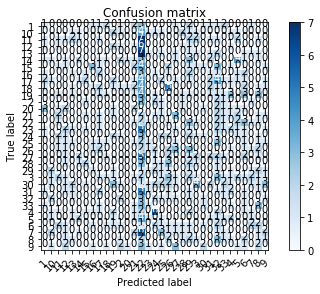

df_R4 ['18'] precison: [ 0.03  0.04  0.03] recall: [ 0.03  0.04  0.04] f1: [ 0.03  0.04  0.03]
Confusion matrix, without normalization
[[0 1 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [2 0 1 ..., 2 0 0]
 ..., 
 [4 2 0 ..., 0 1 0]
 [1 1 0 ..., 2 0 0]
 [4 5 0 ..., 0 0 0]]


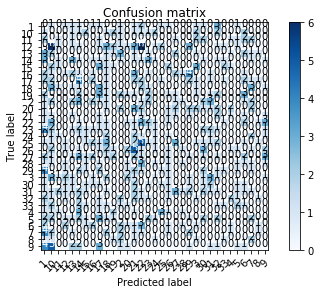

df_R5 ['32'] precison: [ 0.04  0.02  0.04] recall: [ 0.04  0.02  0.03] f1: [ 0.04  0.02  0.03]
Confusion matrix, without normalization
[[0 1 1 ..., 0 0 0]
 [1 1 1 ..., 1 1 0]
 [2 1 2 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 2 0 0]
 [1 0 1 ..., 0 0 0]
 [2 1 0 ..., 3 0 0]]


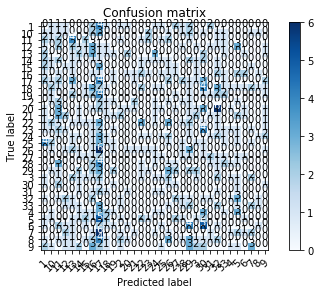

df_R6 ['10'] precison: [ 0.02  0.03  0.03] recall: [ 0.02  0.03  0.04] f1: [ 0.02  0.03  0.03]
Confusion matrix, without normalization
[[1 0 1 ..., 1 2 0]
 [0 1 0 ..., 2 2 2]
 [0 0 0 ..., 1 0 0]
 ..., 
 [0 0 0 ..., 1 1 0]
 [0 0 0 ..., 1 0 0]
 [0 0 1 ..., 0 0 0]]


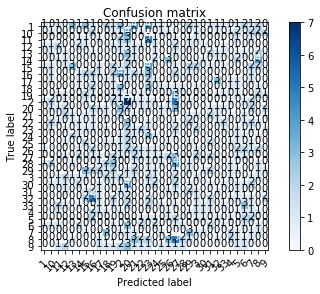

5960 seconds


In [8]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(DecisionTreeClassifier( random_state=14, class_weight='balanced'), 
                        random_state=14, n_estimators=1000, n_jobs=-1)
'''bagging的训练过程旨在降低方差，而boosting的训练过程旨在降低偏差'''
for i in range(1,7):
    df_ =  locals()['df_sr'+ str(i)]
    X_, y_, X_train, X_test, y_train, y_test = classifier_data(df_)
    
    precision, recall, fls = classifier_score(clf)

    clf.fit(X_, y_)
    new = clf.predict(df_.iloc[-1,1: ].values.reshape(1,-1))
    print('df_R'+ str(i), new, 'precison:', precision, 'recall:', recall, 'f1:', fls)
    
    clf.fit(X_train, y_train)
    class_names = clf.classes_
    y_pred = clf.predict(X_test)
    report = classification_report(y_test, y_pred)
    c = np.sum(y_test == y_pred)
    print(report)
    print('n_accuracy:', c)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    plt.figure(figsize=(8,8))
    plot_confusion_matrix(cnf_matrix, classes=class_names)
    plt.show()

endtime = datetime.now()
#end = time.time()
#print(start-end)
Time = endtime - starttime
print(Time.seconds, 'seconds')


In [ ]:

clf = BaggingClassifier(DecisionTreeClassifier(class_weight='balanced'), 
                        random_state=14, n_estimators=1000, n_jobs=-1)
# n_estimators 越多越接近
for i in range(1,7):
    df_ =  locals()['df_sr'+ str(i)]
    df_ = df_.iloc[:-2, :]
    # choose frequence >10 samples
    df_ = df_[df_[99].isin(df_[99].groupby(df_[99]).count()[df_[99].groupby(df_[99]).count()>30].index)]
    X_ = df_.iloc[:, : -1].values
    y_ =  df_[99].astype(str).values
    X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.33, random_state=14)

    # evaluation for best parameters
    precision = cross_val_score(clf, X_, y_, cv=3, scoring='precision_weighted')#预测为正类的样本中实际有多少是正
    recall = cross_val_score(clf, X_, y_, cv=3, scoring='recall_weighted')#实际是正类的样本有多少被预测出来
    fls = cross_val_score(clf, X_, y_, cv=3, scoring='f1_weighted')
    
    clf.fit(X_, y_)
    new = clf.predict(df_.iloc[-1,1: ].values.reshape(1,-1))
    print('df_R'+ str(i), new, 'precison:', precision, 'recall:', recall, 'f1:', fls)
    
    clf.fit(X_train, y_train)
    class_names = clf.classes_
    y_pred = clf.predict(X_test)
    report = classification_report(y_test, y_pred)
    c = np.sum(y_test == y_pred)
    print(report)
    print('n_accuracy:', c)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    plt.figure(figsize=(8,8))
    plot_confusion_matrix(cnf_matrix, classes=class_names)
    plt.show()

endtime = datetime.now()
#end = time.time()
#print(start-end)
Time = endtime - starttime
print(Time.seconds, 'seconds')


In [ ]:
################    1.5  GradientBoostingClassifier model parameters choose and predict

df_R1 ['18'] precison: [ 0.03  0.03  0.03] recall: [ 0.03  0.03  0.03] f1: [ 0.03  0.03  0.03]
Confusion matrix, without normalization
[[1 0 0 ..., 0 0 0]
 [2 1 0 ..., 0 2 1]
 [2 0 1 ..., 1 2 1]
 ..., 
 [0 3 0 ..., 2 0 1]
 [1 0 0 ..., 1 1 0]
 [0 0 1 ..., 2 1 0]]


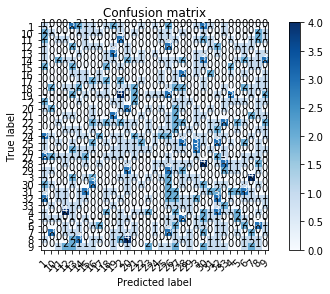

df_R2 ['17'] precison: [ 0.03  0.03  0.03] recall: [ 0.03  0.03  0.03] f1: [ 0.03  0.03  0.03]
Confusion matrix, without normalization
[[0 0 3 ..., 0 0 0]
 [1 0 0 ..., 1 1 0]
 [0 0 0 ..., 2 1 0]
 ..., 
 [2 0 0 ..., 0 2 1]
 [1 1 1 ..., 0 0 0]
 [1 1 0 ..., 1 0 0]]


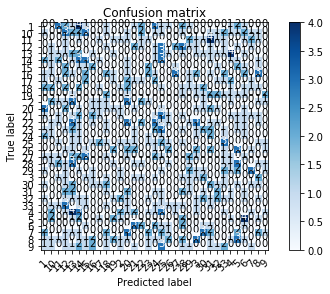

df_R3 ['29'] precison: [ 0.02  0.03  0.04] recall: [ 0.03  0.03  0.05] f1: [ 0.03  0.03  0.04]
Confusion matrix, without normalization
[[0 0 0 ..., 1 1 0]
 [0 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 ..., 
 [0 0 2 ..., 1 0 3]
 [1 1 0 ..., 0 0 1]
 [0 0 0 ..., 0 1 1]]


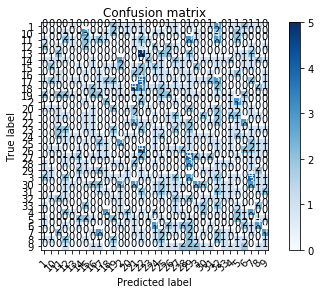

df_R4 ['10'] precison: [ 0.04  0.02  0.05] recall: [ 0.04  0.02  0.05] f1: [ 0.04  0.02  0.05]
Confusion matrix, without normalization
[[0 2 0 ..., 0 0 1]
 [1 0 0 ..., 2 0 0]
 [0 1 1 ..., 0 0 1]
 ..., 
 [1 0 0 ..., 1 1 0]
 [1 0 0 ..., 0 0 0]
 [2 1 0 ..., 0 0 0]]


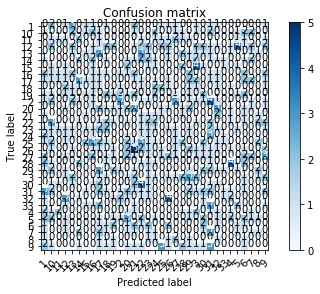

df_R5 ['11'] precison: [ 0.03  0.03  0.04] recall: [ 0.03  0.03  0.04] f1: [ 0.03  0.03  0.04]
Confusion matrix, without normalization
[[0 0 1 ..., 0 0 0]
 [1 0 0 ..., 0 1 0]
 [1 1 0 ..., 0 0 0]
 ..., 
 [0 1 0 ..., 1 0 0]
 [0 1 1 ..., 0 2 0]
 [2 0 2 ..., 0 0 1]]


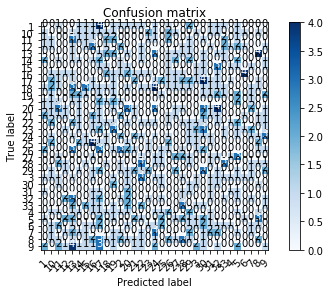

df_R6 ['11'] precison: [ 0.04  0.02  0.02] recall: [ 0.03  0.02  0.02] f1: [ 0.03  0.02  0.02]
Confusion matrix, without normalization
[[0 0 3 ..., 1 0 1]
 [0 1 1 ..., 0 1 1]
 [1 1 0 ..., 1 0 0]
 ..., 
 [1 0 1 ..., 2 1 0]
 [0 0 2 ..., 1 0 0]
 [0 0 1 ..., 0 0 1]]


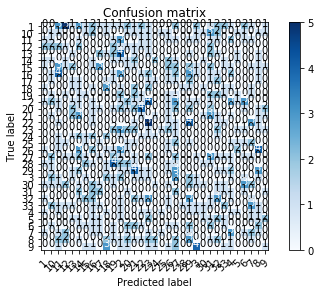

17193 seconds


In [10]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(learning_rate=0.1, n_estimators=1000, random_state=14)
'''Gradient Tree Boosting的子模型都拥有较低的方差，整体模型的训练过程旨在降低偏差，故其需要较多的子模型（n_estimators默认值为100）
且子模型为弱模型（max_depth的默认值为3），但是降低子模型间的相关度不能显著减少整体模型的方差（max_features的默认值为None）'''
for i in range(1,7):
    df_ =  locals()['df_sr'+ str(i)]
    X_, y_, X_train, X_test, y_train, y_test = classifier_data(df_)
    
    precision, recall, fls = classifier_score(clf)
    
    clf.fit(X_, y_)
    new = clf.predict(df_.iloc[-1,1: ].values.reshape(1,-1))
    print('df_R'+ str(i), new, 'precison:', precision, 'recall:', recall, 'f1:', fls)

    clf.fit(X_train, y_train)
    class_names = np.unique(y_train)
    y_pred = clf.predict(X_test)
    report = classification_report(y_test, y_pred)
    c = np.sum(y_test == y_pred)
    print(report)
    print('n_accuracy:', c)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    plt.figure(figsize=(8,8))
    plot_confusion_matrix(cnf_matrix, classes=class_names)
    plt.show()
endtime = datetime.now()
#end = time.time()
#print(start-end)
Time = endtime - starttime
print(Time.seconds, 'seconds')

In [ ]:
################    1.6 ExtraTreesClassifier model parameters choose and predict

df_R1 ['5'] precison: [ 0.04  0.03  0.03] recall: [ 0.04  0.03  0.03] f1: [ 0.04  0.03  0.03]
Confusion matrix, without normalization
[[0 2 0 ..., 0 1 1]
 [0 0 0 ..., 0 0 1]
 [2 2 0 ..., 0 1 1]
 ..., 
 [0 3 0 ..., 2 1 0]
 [2 1 0 ..., 2 0 0]
 [1 1 0 ..., 0 0 2]]


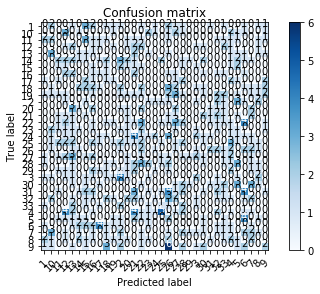

df_R2 ['17'] precison: [ 0.03  0.02  0.03] recall: [ 0.03  0.02  0.03] f1: [ 0.03  0.02  0.03]
Confusion matrix, without normalization
[[0 1 4 ..., 0 2 0]
 [2 0 1 ..., 4 0 0]
 [0 2 0 ..., 1 0 0]
 ..., 
 [1 2 1 ..., 1 0 1]
 [1 1 0 ..., 1 1 2]
 [1 1 0 ..., 0 0 0]]


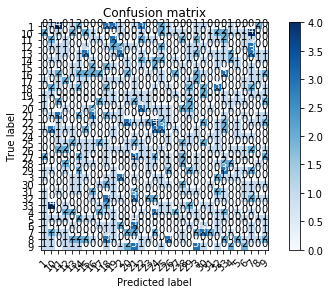

df_R3 ['4'] precison: [ 0.03  0.05  0.04] recall: [ 0.04  0.04  0.04] f1: [ 0.04  0.04  0.04]
Confusion matrix, without normalization
[[2 0 1 ..., 0 0 1]
 [2 0 0 ..., 0 0 0]
 [1 0 1 ..., 0 0 0]
 ..., 
 [1 1 0 ..., 0 1 2]
 [2 0 1 ..., 0 1 0]
 [0 1 1 ..., 1 0 0]]


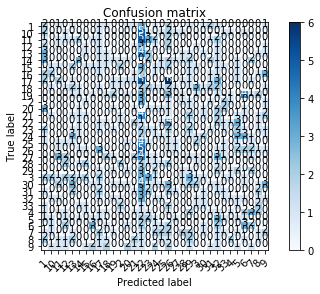

df_R4 ['12'] precison: [ 0.02  0.04  0.03] recall: [ 0.02  0.04  0.03] f1: [ 0.02  0.04  0.03]
Confusion matrix, without normalization
[[0 2 0 ..., 2 0 2]
 [1 0 0 ..., 1 0 0]
 [1 2 1 ..., 1 0 0]
 ..., 
 [1 1 0 ..., 1 0 0]
 [1 0 0 ..., 0 0 1]
 [5 5 0 ..., 0 0 0]]


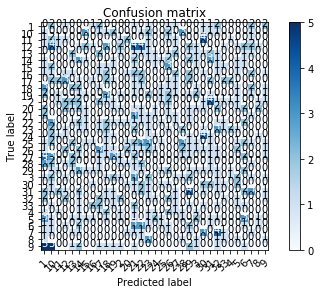

df_R5 ['23'] precison: [ 0.02  0.03  0.03] recall: [ 0.02  0.03  0.03] f1: [ 0.02  0.03  0.03]
Confusion matrix, without normalization
[[0 0 1 ..., 0 0 1]
 [2 0 0 ..., 0 0 1]
 [1 0 2 ..., 1 0 0]
 ..., 
 [0 0 2 ..., 0 0 0]
 [1 0 0 ..., 0 0 1]
 [0 1 0 ..., 0 1 1]]


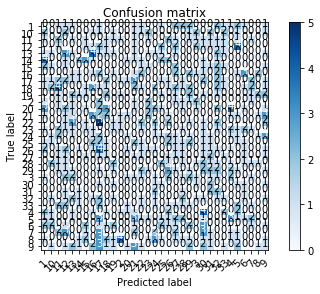

df_R6 ['23'] precison: [ 0.03  0.04  0.02] recall: [ 0.03  0.04  0.02] f1: [ 0.03  0.04  0.02]
Confusion matrix, without normalization
[[2 0 0 ..., 0 1 0]
 [2 0 3 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 ..., 
 [1 0 1 ..., 1 0 0]
 [1 1 2 ..., 1 1 1]
 [1 3 0 ..., 0 0 0]]


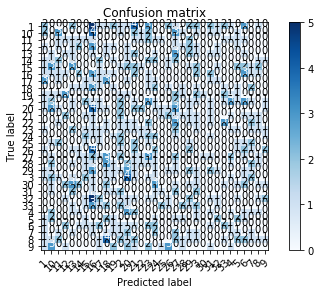

21953 seconds


In [11]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=1000, max_features=None, random_state=14, n_jobs=-1,  class_weight='balanced')

for i in range(1,7):
    df_ =  locals()['df_sr'+ str(i)]
    X_, y_, X_train, X_test, y_train, y_test = classifier_data(df_)
    
    precision, recall, fls = classifier_score(clf)
    
    clf.fit(X_, y_)
    new = clf.predict(df_.iloc[-1,1: ].values.reshape(1,-1))
    print('df_R'+ str(i), new, 'precison:', precision, 'recall:', recall, 'f1:', fls)

    clf.fit(X_train, y_train)
    class_names = clf.classes_
    y_pred = clf.predict(X_test)
    report = classification_report(y_test, y_pred)
    c = np.sum(y_test == y_pred)
    print(report)
    print('n_accuracy:', c)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    plt.figure(figsize=(8,8))
    plot_confusion_matrix(cnf_matrix, classes=class_names)
    plt.show()

endtime = datetime.now()
#end = time.time()
#print(start-end)
Time = endtime - starttime
print(Time.seconds, 'seconds')

In [ ]:
################    1.7 RandomForestClassifier model parameters choose and predict for sorted data

Fitting 3 folds for each of 150 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  1.9min finished


Fitting 3 folds for each of 150 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  2.0min finished


df_R1 ['7'] 0.0 precison: [ 0.04  0.03  0.05] recall: [ 0.04  0.03  0.05] f1: [ 0.04  0.03  0.05]
Pipeline(steps=[('clf', RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=20, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=14, verbose=0, warm_start=False))])
Fitting 3 folds for each of 150 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  1.3min finished


Confusion matrix, without normalization
[[1 2 1 ..., 1 1 2]
 [2 0 1 ..., 0 1 0]
 [1 1 1 ..., 1 1 1]
 ..., 
 [1 0 0 ..., 0 0 2]
 [1 0 0 ..., 0 1 2]
 [1 1 0 ..., 1 2 1]]


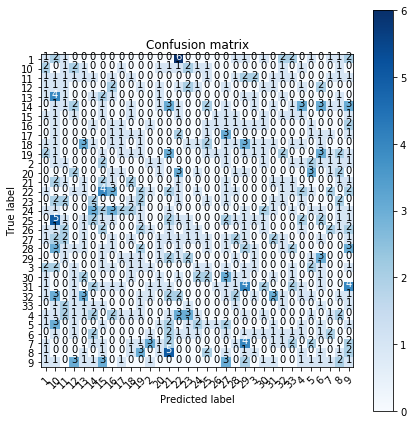

Fitting 3 folds for each of 150 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  2.0min finished


Fitting 3 folds for each of 150 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  2.0min finished


df_R2 ['6'] 0.073757699358 precison: [ 0.04  0.04  0.04] recall: [ 0.04  0.03  0.04] f1: [ 0.04  0.03  0.04]
Pipeline(steps=[('clf', RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=50, max_features=2,
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=14, verbose=0, warm_start=False))])
Fitting 3 folds for each of 150 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  1.3min finished


Confusion matrix, without normalization
[[1 1 0 ..., 0 0 1]
 [1 0 0 ..., 0 1 0]
 [2 0 1 ..., 0 1 0]
 ..., 
 [1 0 0 ..., 1 0 2]
 [1 0 0 ..., 1 2 0]
 [0 1 1 ..., 0 1 0]]


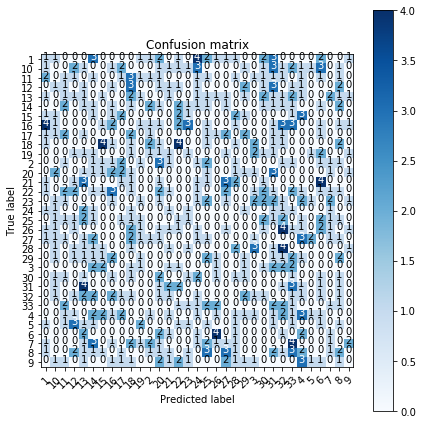

Fitting 3 folds for each of 150 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  2.1min finished


Fitting 3 folds for each of 150 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  2.1min finished


df_R3 ['21'] 0.016377601071 precison: [ 0.03  0.04  0.04] recall: [ 0.03  0.05  0.05] f1: [ 0.03  0.04  0.04]
Pipeline(steps=[('clf', RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=20, max_features=30,
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=6, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=14, verbose=0, warm_start=False))])
Fitting 3 folds for each of 150 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  1.4min finished


Confusion matrix, without normalization
[[0 2 0 ..., 1 0 0]
 [0 1 0 ..., 0 0 0]
 [1 1 3 ..., 3 0 0]
 ..., 
 [0 1 1 ..., 0 1 0]
 [1 1 0 ..., 0 0 0]
 [2 1 0 ..., 1 0 0]]


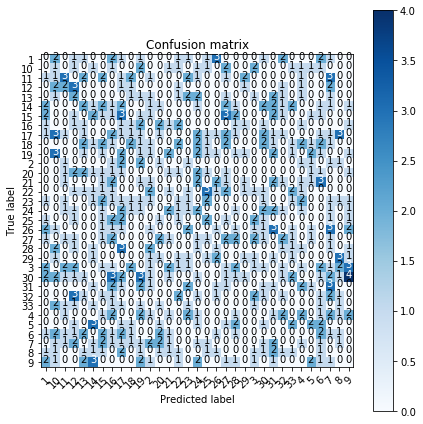

Fitting 3 folds for each of 150 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  2.1min finished


Fitting 3 folds for each of 150 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  2.1min finished


df_R4 ['15'] 0.0242806956081 precison: [ 0.05  0.04  0.03] recall: [ 0.05  0.04  0.03] f1: [ 0.04  0.04  0.03]
Pipeline(steps=[('clf', RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=20, max_features=30,
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=14, verbose=0, warm_start=False))])
Fitting 3 folds for each of 150 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  1.4min finished


Confusion matrix, without normalization
[[0 0 0 ..., 0 1 0]
 [0 1 0 ..., 0 1 1]
 [2 0 0 ..., 0 1 1]
 ..., 
 [0 2 1 ..., 1 1 0]
 [1 0 0 ..., 0 0 1]
 [0 0 1 ..., 1 0 2]]


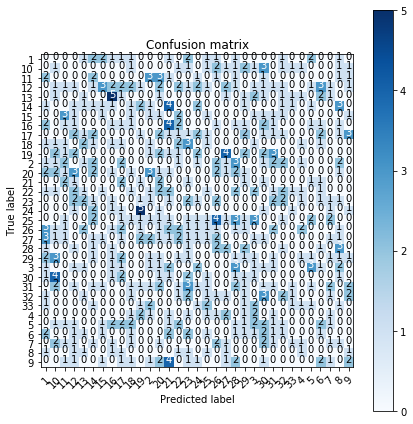

Fitting 3 folds for each of 150 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   29.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  2.2min finished


Fitting 3 folds for each of 150 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  2.1min finished


df_R5 ['19'] 0.0148285287675 precison: [ 0.04  0.03  0.05] recall: [ 0.04  0.03  0.05] f1: [ 0.04  0.03  0.05]
Pipeline(steps=[('clf', RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=20, max_features=None,
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=6, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=14, verbose=0, warm_start=False))])
Fitting 3 folds for each of 150 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  1.4min finished


Confusion matrix, without normalization
[[0 1 3 ..., 0 0 0]
 [1 0 0 ..., 1 0 2]
 [0 1 0 ..., 1 1 0]
 ..., 
 [1 1 2 ..., 3 0 0]
 [0 0 0 ..., 0 0 1]
 [0 0 0 ..., 1 1 1]]


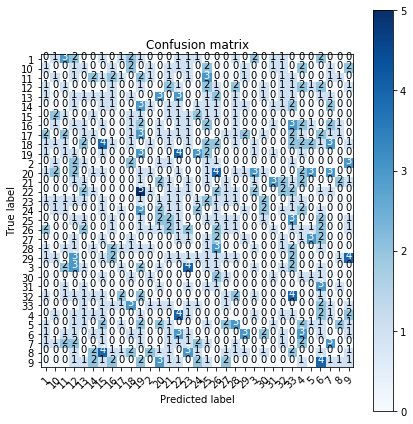

Fitting 3 folds for each of 150 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  2.1min finished


Fitting 3 folds for each of 150 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  2.1min finished


df_R6 ['28'] 0.03494884624 precison: [ 0.02  0.05  0.04] recall: [ 0.03  0.05  0.03] f1: [ 0.03  0.05  0.03]
Pipeline(steps=[('clf', RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=20, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=14, verbose=0, warm_start=False))])
Fitting 3 folds for each of 150 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  1.4min finished


Confusion matrix, without normalization
[[1 0 0 ..., 2 4 1]
 [0 0 1 ..., 1 0 1]
 [1 1 0 ..., 0 0 1]
 ..., 
 [0 0 0 ..., 1 0 1]
 [2 0 0 ..., 3 1 0]
 [1 2 2 ..., 0 0 0]]


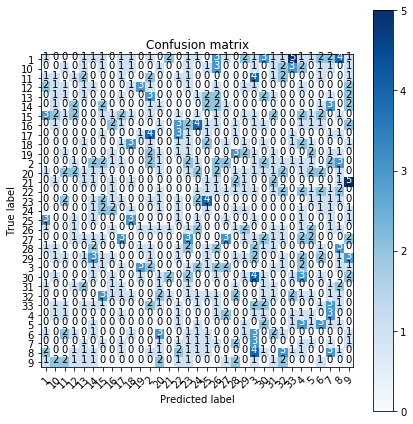

2038 seconds


In [8]:
#########    RF predict result
from sklearn.ensemble import RandomForestClassifier
starttime = datetime.now()
#start = time.time()

pipeline_RF = Pipeline([('clf', RandomForestClassifier(random_state=14, class_weight='balanced', n_estimators=10))])
''' Random Forest的子模型都拥有较低的偏差，整体模型的训练过程旨在降低方差，故其需要较少的子模型（n_estimators默认值为10）
 且子模型不为弱模型（max_depth的默认值为None），同时，降低子模型间的相关度可以起到减少整体模型的方差的效果（max_features的默认值为auto）'''
# class_weight='balanced' can solve sparse problem, but it still exsit
parameter_space = {'clf__max_features':[2, 30, 50, None, 'auto'], 
                   'clf__criterion': ['gini', 'entropy'], 
                   'clf__min_samples_leaf': [2, 4, 6, 8, 10],
                   'clf__max_depth': [20, 50, 100]}

for i in range(1,7):
    df_ =  locals()['df_sr'+ str(i)]
    X_, y_, X_train, X_test, y_train, y_test = classifier_data(df_)
    
    grid_RF = GridSearchCV(pipeline_RF, parameter_space, n_jobs=-1, verbose=1)
    grid_RF.fit(X_, y_)
    
    # evaluation for best parameter
    precision, recall, fls = classifier_score(grid_RF.best_estimator_)
    
    grid_RF.fit(X_, y_)
    new = grid_RF.predict(df_.iloc[-1,1: ].values.reshape(1,-1))
    p_new = grid_RF.predict_proba(df_.iloc[-1,1: ].values.reshape(1,-1))[0][1]
    print('df_R'+ str(i), new, p_new, 'precison:', precision, 'recall:', recall, 'f1:', fls)
    print(grid_RF.best_estimator_)
    
    grid_RF.fit(X_train, y_train)
    class_names = np.unique(y_train)
    y_pred = grid_RF.predict(X_test)
    report = classification_report(y_test, y_pred)
    c = np.sum(y_test == y_pred)
    print(report)
    print('n_accuracy:', c)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    plt.figure(figsize=(8,8))
    plot_confusion_matrix(cnf_matrix, classes=class_names)
    plt.show()

endtime = datetime.now()
#end = time.time()
#print(start-end)
Time = endtime - starttime
print(Time.seconds, 'seconds')

In [ ]:
################    2.  Regressor model for sorted data

In [9]:
def regressor_data(df_):
    # choose frequence >10 samples
    X_ = df_.iloc[:, : -1].values
    y_ =  df_.iloc[, :-1].values
    X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.33, random_state=14)
    return X_, y_, X_train, X_test, y_train, y_test
def regressor_score(clf, cv=3):
    NMAE = cross_val_score(clf, X_, y_, cv=cv, scoring='neg_median_absolute_error')
    NMSE = cross_val_score(clf, X_, y_, cv=cv, scoring='neg_mean_squared_error')
    r2 = cross_val_score(clf, X_, y_, cv=cv, scoring='r2')
    return NMAE, NMSE, r2

In [ ]:
################    2.2 DecisionTreeRegressor model  for sorted data

In [11]:
from sklearn.tree import DecisionTreeRegressor
pipeline_DT = Pipeline([('clf', DecisionTreeRegressor(random_state=14))])
paras_DT = {'clf__max_depth': (2, 10, 50),
            'clf__criterion': ('mse', 'friedman_mse', 'mae'),
            'clf__min_samples_split': (2, 3, 4),
            'clf__min_samples_leaf': (20, 30, 40)}
for i in range(1,7):
    df_ =  locals()['df_sr'+ str(i)]
    X_, y_, X_train, X_test, y_train, y_test = regressor_data(df_)
    
    grid_DT=GridSearchCV(pipeline_DT, paras_DT, n_jobs=-1, verbose=1, scoring=None)
    #default=None, and the default scorer of DT is accuracy. see also DecisionTreeClassifier.score(X, y)
    grid_DT.fit(X_, y_)
    # evaluation for best parameters
    '''EV = cross_val_score(grid_DT.best_estimator_, X_train, y_train, cv=3, scoring='explained_variance')
    #  'explained_variance' is not a valid scoring value???'''
    NMAE, NMSE, r2 = regressor_score(grid_DT.best_estimator_, 3)
    [new] = grid_DT.predict(df_.iloc[-1,1: ].values.reshape(1,-1))
    print('df_R'+ str(i), new, 'neg_median_absolute_error:', NMAE, 'neg_mean_squared_error:', NMSE, 'r2:', r2)
    print(grid_DT.best_estimator_)

endtime = datetime.now()
#end = time.time()
#print(start-end)
Time = endtime - starttime
print(Time.seconds, 'seconds')

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:   57.4s finished


df_R1 17.2912262156 neg_median_absolute_error: [-8.56 -8.36 -7.77] neg_mean_squared_error: [-93.23 -95.66 -90.87] r2: [-0.   -0.02 -0.  ]
Pipeline(steps=[('clf', DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=40, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=14,
           splitter='best'))])
Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 235 tasks      | elapsed:   42.2s
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:   47.3s finished


df_R2 16.6694101509 neg_median_absolute_error: [-8.45 -7.67 -7.61] neg_mean_squared_error: [-92.55 -86.18 -89.85] r2: [-0.02  0.   -0.02]
Pipeline(steps=[('clf', DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=30, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=14,
           splitter='best'))])
Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 230 tasks      | elapsed:   48.5s
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:   56.0s finished


df_R3 17.1935056329 neg_median_absolute_error: [-8.44 -8.13 -8.18] neg_mean_squared_error: [-94.23 -88.6  -86.97] r2: [-0.01  0.   -0.01]
Pipeline(steps=[('clf', DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=30, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=14,
           splitter='best'))])
Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 233 tasks      | elapsed:   48.9s
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:   55.4s finished


df_R4 18.4301833568 neg_median_absolute_error: [-7.83 -8.01 -8.23] neg_mean_squared_error: [-89.18 -94.47 -92.89] r2: [-0.02 -0.03 -0.02]
Pipeline(steps=[('clf', DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=20, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=14,
           splitter='best'))])
Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:   47.3s
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:   54.4s finished


df_R5 17.2091179386 neg_median_absolute_error: [-7.72 -8.64 -7.51] neg_mean_squared_error: [-87.66 -96.12 -91.44] r2: [-0.04 -0.02 -0.04]
Pipeline(steps=[('clf', DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=40, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=14,
           splitter='best'))])
Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:   52.1s
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:   57.9s finished


df_R6 15.8139013453 neg_median_absolute_error: [-8.61 -8.22 -8.03] neg_mean_squared_error: [-96.02 -95.55 -90.43] r2: [-0.03 -0.04 -0.04]
Pipeline(steps=[('clf', DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=20, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=14,
           splitter='best'))])
3587 seconds


In [ ]:
################    2.3  AdaBoostRegressor model parameters choose and predict for sorted data

In [12]:
from sklearn.ensemble import AdaBoostRegressor
clf = AdaBoostRegressor(DecisionTreeRegressor(max_depth=2, random_state=14, criterion='mse'), 
                        n_estimators=5000, learning_rate=1.0, loss='linear', random_state=14)

for i in range(1,7):
    df_ =  locals()['df_sr'+ str(i)]
    X_, y_, X_train, X_test, y_train, y_test = regressor_data(df_)

    # evaluation for best parameters
    '''EV = cross_val_score(grid_DT.best_estimator_, X_train, y_train, cv=3, scoring='explained_variance')
    #  'explained_variance' is not a valid scoring value???'''
    NMAE, NMSE, r2 = regressor_score(clf, 3)
    clf.fit(X_, y_)
    [new] = clf.predict(df_.iloc[-1,1: ].values.reshape(1,-1))
    print('df_R'+ str(i), new, 'neg_median_absolute_error:', NMAE, 'neg_mean_squared_error:', NMSE, 'r2:', r2)

endtime = datetime.now()
#end = time.time()
#print(start-end)
Time = endtime - starttime
print(Time.seconds, 'seconds')

df_R1 16.2560679612 neg_median_absolute_error: [-8.81 -8.87 -8.29] neg_mean_squared_error: [-93.14 -95.28 -91.25] r2: [-0.   -0.02 -0.01]
df_R2 16.7551963048 neg_median_absolute_error: [-8.12 -8.05 -8.04] neg_mean_squared_error: [-90.84 -86.55 -87.69] r2: [  6.64e-05  -1.81e-03  -3.68e-04]
df_R3 17.374025974 neg_median_absolute_error: [-8.59 -8.25 -8.01] neg_mean_squared_error: [-93.07 -88.76 -87.74] r2: [ 0.   -0.   -0.02]
df_R4 17.9157175399 neg_median_absolute_error: [-7.89 -8.09 -8.33] neg_mean_squared_error: [-90.68 -92.89 -91.88] r2: [-0.03 -0.01 -0.01]
df_R5 17.0394366197 neg_median_absolute_error: [-7.74 -8.68 -7.85] neg_mean_squared_error: [-85.1  -95.26 -87.64] r2: [-0.01 -0.01  0.  ]
df_R6 17.5356762513 neg_median_absolute_error: [-8.67 -8.43 -8.1 ] neg_mean_squared_error: [-94.46 -93.15 -88.54] r2: [-0.01 -0.01 -0.01]
3596 seconds


In [ ]:
################    2.4  BaggingRegressor model parameters choose and predict for sorted data

In [13]:
from sklearn.ensemble import BaggingRegressor
clf = BaggingRegressor(DecisionTreeRegressor(max_depth=2, random_state=14, criterion='mse'), 
                        random_state=14, n_estimators=1000, n_jobs=-1)

for i in range(1,7):
    df_ =  locals()['df_sr'+ str(i)]
    X_, y_, X_train, X_test, y_train, y_test = regressor_data(df_)

    # evaluation for best parameters
    '''EV = cross_val_score(grid_DT.best_estimator_, X_train, y_train, cv=3, scoring='explained_variance')
    #  'explained_variance' is not a valid scoring value???'''
    NMAE, NMSE, r2 = regressor_score(clf, 3)
    clf.fit(X_, y_)
    [new] = clf.predict(df_.iloc[-1,1: ].values.reshape(1,-1))
    print('df_R'+ str(i), new, 'neg_median_absolute_error:', NMAE, 'neg_mean_squared_error:', NMSE, 'r2:', r2)

endtime = datetime.now()
#end = time.time()
#print(start-end)
Time = endtime - starttime
print(Time.seconds, 'seconds')


df_R1 16.9523596985 neg_median_absolute_error: [-8.85 -8.86 -8.22] neg_mean_squared_error: [-93.19 -94.1  -90.76] r2: [-0.   -0.01 -0.  ]
df_R2 16.6385729973 neg_median_absolute_error: [-8.19 -7.87 -8.  ] neg_mean_squared_error: [-90.24 -86.19 -87.36] r2: [ 0.01  0.    0.  ]
df_R3 17.2190445916 neg_median_absolute_error: [-8.68 -8.15 -8.05] neg_mean_squared_error: [-93.02 -89.07 -85.9 ] r2: [ 0. -0. -0.]
df_R4 17.10499522 neg_median_absolute_error: [-7.96 -8.02 -8.17] neg_mean_squared_error: [-88.   -92.12 -90.76] r2: [-0. -0.  0.]
df_R5 16.7579392658 neg_median_absolute_error: [-7.68 -8.74 -7.67] neg_mean_squared_error: [-84.97 -95.12 -88.14] r2: [-0.01 -0.01 -0.  ]
df_R6 16.6383800701 neg_median_absolute_error: [-8.54 -8.45 -8.05] neg_mean_squared_error: [-93.44 -92.67 -87.53] r2: [-0. -0. -0.]
4243 seconds


In [ ]:
################    2.5  GradientBoostingRegressor model parameters choose and predict for sorted data

In [14]:
from sklearn.ensemble import GradientBoostingRegressor
clf = GradientBoostingRegressor(learning_rate=0.1, n_estimators=1000, random_state=14, loss='ls', criterion='friedman_mse')

for i in range(1,7):
    df_ =  locals()['df_sr'+ str(i)]
    X_, y_, X_train, X_test, y_train, y_test = regressor_data(df_)

    # evaluation for best parameters
    '''EV = cross_val_score(grid_DT.best_estimator_, X_train, y_train, cv=3, scoring='explained_variance')
    #  'explained_variance' is not a valid scoring value???'''
    NMAE, NMSE, r2 = regressor_score(clf, 3)
    clf.fit(X_, y_)
    [new] = clf.predict(df_.iloc[-1,1: ].values.reshape(1,-1))
    print('df_R'+ str(i), new, 'neg_median_absolute_error:', NMAE, 'neg_mean_squared_error:', NMSE, 'r2:', r2)
    
endtime = datetime.now()
#end = time.time()
#print(start-end)
Time = endtime - starttime
print(Time.seconds, 'seconds')

df_R1 21.3693081524 neg_median_absolute_error: [-8.4  -8.69 -8.45] neg_mean_squared_error: [-112.85 -115.33 -112.09] r2: [-0.22 -0.23 -0.24]
df_R2 15.8528713578 neg_median_absolute_error: [-8.   -8.2  -7.82] neg_mean_squared_error: [-104.97 -102.3  -100.47] r2: [-0.16 -0.18 -0.15]
df_R3 17.8015902656 neg_median_absolute_error: [-8.67 -8.2  -7.86] neg_mean_squared_error: [-107.63 -104.96 -102.75] r2: [-0.15 -0.18 -0.2 ]
df_R4 17.0605636006 neg_median_absolute_error: [-8.14 -8.56 -8.06] neg_mean_squared_error: [-104.65 -113.74 -104.1 ] r2: [-0.19 -0.24 -0.14]
df_R5 16.9424526036 neg_median_absolute_error: [-7.98 -8.67 -7.81] neg_mean_squared_error: [ -98.75 -115.69 -106.59] r2: [-0.17 -0.23 -0.21]
df_R6 11.5955955711 neg_median_absolute_error: [-8.09 -8.03 -7.62] neg_mean_squared_error: [-107.33 -112.46 -102.36] r2: [-0.15 -0.22 -0.17]
4634 seconds


In [ ]:
################    2.6  ExtraTreesRegressor model parameters choose and predict for sorted data

In [15]:
from sklearn.ensemble import ExtraTreesRegressor
clf = ExtraTreesRegressor(n_estimators=1000, max_features=None, random_state=14, n_jobs=-1)

for i in range(1,7):
    df_ =  locals()['df_sr'+ str(i)]
    X_, y_, X_train, X_test, y_train, y_test = regressor_data(df_)

    # evaluation for best parameters
    '''EV = cross_val_score(grid_DT.best_estimator_, X_train, y_train, cv=3, scoring='explained_variance')
    #  'explained_variance' is not a valid scoring value???'''
    NMAE, NMSE, r2 = regressor_score(clf, 3)
    clf.fit(X_train, y_train)
    [new] = clf.predict(df_.iloc[-1,1: ].values.reshape(1,-1))
    print('df_R'+ str(i), new, 'neg_median_absolute_error:', NMAE, 'neg_mean_squared_error:', NMSE, 'r2:', r2)

KeyError: 'df_r1'

In [ ]:
################    2.7  RandomForestRegressor model parameters choose and predict for sorted data

In [ ]:
#########    RF predict result
from sklearn.ensemble import RandomForestRegressor
starttime = datetime.now()
#start = time.time()

pipeline_RF = Pipeline([('clf', RandomForestRegressor(random_state=14, n_estimators=10, n_jobs=-1))])
# class_weight='balanced' can solve sparse problem, but it still exsit
parameter_space = {'clf__max_features':[2, None, 'auto'],  
                   'clf__criterion': ['mse', 'mae'], 
                   'clf__min_samples_leaf': [2, 6],
                   'clf__max_depth': [2, 20, None]}

for i in range(1,7):
    df_ =  locals()['df_sr'+ str(i)]
    X_, y_, X_train, X_test, y_train, y_test = regressor_data(df_)

    
    grid_RF = GridSearchCV(pipeline_RF, parameter_space, n_jobs=-1, verbose=1)
    #grid_RF.fit(X_, y_)
    grid_RF.fit(X_train, y_train)
    # evaluation for best parameters
    NMAE, NMSE, r2 = regressor_score(grid_RF.best_estimator_, 3)
    
    [new] = grid_RF.predict(df_.iloc[-1,1: ].values.reshape(1,-1))
    print('df_R'+ str(i), new, 'neg_median_absolute_error:', NMAE, 'neg_mean_squared_error:', NMSE, 'r2:', r2)
    print(grid_RF.best_estimator_)

endtime = datetime.now()
#end = time.time()
#print(start-end)
Time = endtime - starttime
print(Time.seconds, 'seconds')

57 seconds


In [ ]:
'''
pro_ball = defaultdict(int)
pipeline_DT = Pipeline([('clf', DecisionTreeClassifier(random_state=14))])
paras_DT = {'clf__max_depth': (2, 10, 50),
            'clf__criterion': ('gini', 'entropy'),
            #'clf__min_samples_split': (2, 3),
            'clf__min_samples_leaf': (20, 30, 40)}
new =[]
for r in range(-10, 0):
    for i in range(1,7):
        df_ =  locals()['df_r'+ str(i)]
        df_ = df_[df_[99].isin(df_[99].groupby(df_[99]).count()[df_[99].groupby(df_[99]).count()>10].index)]
        X_train = df_.iloc[:r, : -1].values
        y_train = df_[99][:r].astype(str).values
        #y_train = [1 if x else 0 for x in y_train]
        grid_search_DT=GridSearchCV(pipeline_DT, paras_DT, n_jobs=-1, verbose=1)
        grid_search_DT.fit(X_train, y_train)
        pro_ball[i] = grid_search_DT.predict(df_.iloc[r-1, 1: ].values.reshape(1, -1))
        
    print(pro_ball)
    new.append(sorted(int(v) for (k, [v]) in pro_ball.items()))
    print(r)'''